# SLC-Mini-project-Part-II

## Step 1: Understand the business problem.

3. Name - Name of the restaurant. - Object datatype
4. Online Order - The customer ordered the menu online or not. - Object datatype
5. Book table - The customer has booked the table or not. - Object datatype
6. Rate - Rating of the restaurant that has by the customer. - Numerical datatype
7. Votes - The votes have been given by the customer to the restaurant. - Numerical 
datatype
9. Location - The city name where the restaurant is located. - Object datatype
10. Rest Type - The type of restaurant. - Object datatype
11. Dish liked - Dishes liked by the customer from the restaurant. - Object datatype
12. Cuisines - The cuisines that have been prepared by the restaurant. - Object datatype
13. Approx Cost for two people - The approximate cost of the customer for 2 people. -
Number datatype
14. Reviews list - The reviews made by the customers on the restaurant. - Object 
datatype
15. Menu Item - The menu items that are usually available at the restaurant. - Object 
datatype
16. Listed in (type) - Contains the type of the meal. - Object datatype
17. Listed in (city) - This contains the neighborhood in which the restaurant is listed. -
Object datatype

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from scipy.stats import ttest_ind
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report

In [3]:
zomato=pd.read_csv('D:/PGP-DSE EXERCISES/SLR/revised_data.csv')

In [4]:
zomato.head()

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,Jalsa,1,1,4.1,775,1,27,2091,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",8778,Buffet,Banashankari
1,1,Spice Elephant,1,0,4.1,787,1,27,922,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",8778,Buffet,Banashankari
2,2,San Churro Cafe,1,0,3.8,918,1,22,743,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",8778,Buffet,Banashankari
3,3,Addhuri Udupi Bhojana,0,0,3.7,88,1,78,2469,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",8778,Buffet,Banashankari
4,4,Grand Village,0,0,3.8,166,4,27,2119,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",8778,Buffet,Banashankari


In [5]:
zomato.drop("Unnamed: 0",axis=1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,1,1,4.1,775,1,27,2091,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",8778,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,1,27,922,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",8778,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,1,22,743,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",8778,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,78,2469,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",8778,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,4,27,2119,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",8778,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49337,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,89,8,977,1.5,"[('Rated 5.0', ""RATED\n Food and service are ...",8778,Pubs and bars,Whitefield
49338,Vinod Bar And Restaurant,0,0,3.9,0,89,8,1346,600.0,[],8778,Pubs and bars,Whitefield
49339,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,3.9,0,89,8,1346,2.0,[],8778,Pubs and bars,Whitefield
49340,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,26,8,1346,2.5,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",8778,Pubs and bars,Whitefield


In [5]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    49342 non-null  int64  
 1   name          49342 non-null  object 
 2   online_order  49342 non-null  int64  
 3   book_table    49342 non-null  int64  
 4   rate          49342 non-null  float64
 5   votes         49342 non-null  int64  
 6   location      49342 non-null  int64  
 7   rest_type     49342 non-null  int64  
 8   cuisines      49342 non-null  int64  
 9   cost          49342 non-null  float64
 10  reviews_list  49342 non-null  object 
 11  menu_item     49342 non-null  int64  
 12  type          49342 non-null  object 
 13  city          49342 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 5.3+ MB


In [6]:
zomato.shape

(49342, 14)

In [6]:
zomato.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,49342.0,24720.148839,14272.631569,0.0,12365.25,24721.5,37077.75,49439.0
online_order,49342.0,0.593511,0.491183,0.0,0.00,1.0,1.00,1.0
book_table,49342.0,0.127923,0.334008,0.0,0.00,0.0,0.00,1.0
rate,49342.0,3.731794,0.411090,1.8,3.50,3.8,4.00,4.9
votes,49342.0,297.198958,820.470009,0.0,9.00,47.0,212.00,16832.0
location,49342.0,36.245774,27.143372,0.0,12.00,32.0,55.00,92.0
rest_type,49342.0,50.983787,27.538863,0.0,27.00,41.0,78.00,92.0
cuisines,49342.0,1353.074257,746.366820,0.0,665.00,1417.0,1898.00,2631.0
cost,49342.0,361.322610,230.429289,1.0,200.00,350.0,500.00,950.0
menu_item,49342.0,7737.397633,2238.018399,0.0,8778.00,8778.0,8778.00,8778.0


In [7]:
zomato.describe(include='object').T

,count,unique,top,freq
name,49342,8449,Cafe Coffee Day,93
reviews_list,49342,22063,[],6353
type,49342,7,Delivery,24664
city,49342,30,BTM,3100


## Step 2: Use the data sets that have been cleaned data types and missing values in section A - step 3.

### Target variable - online_order

In [8]:
zomato.loc[zomato['online_order']== 1].value_counts().sum()

29285

In [9]:
zomato.loc[zomato['online_order']== 0].value_counts().sum()

20057

### Univariate Analysis

In [7]:
df_yes= zomato.loc[zomato['online_order']== 1]
df_no=zomato.loc[zomato['online_order']== 0]

<function matplotlib.pyplot.show(close=None, block=None)>

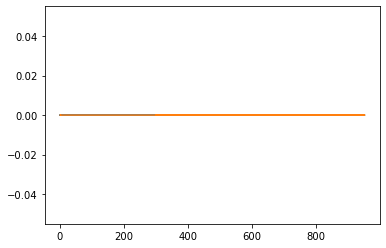

In [8]:
plt.plot(df_yes['cost'],np.zeros_like(df_yes['cost']))
plt.plot(df_no['cost'],np.zeros_like(df_no['cost']))
plt.show

### Bivariate Analysis

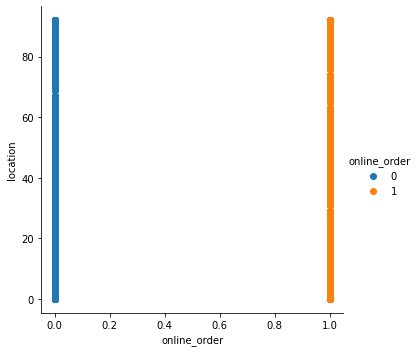

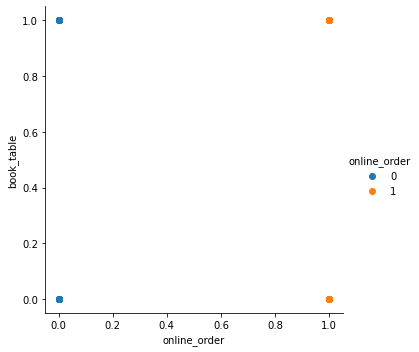

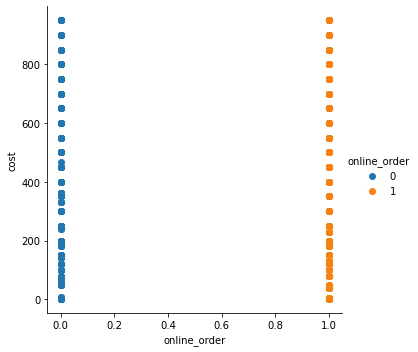

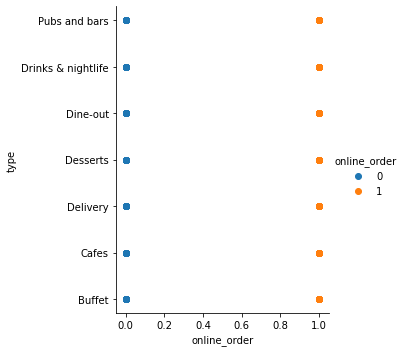

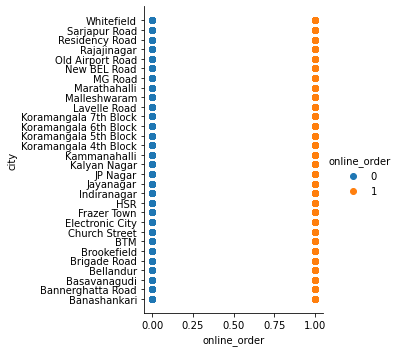

In [9]:
columns = ["location","book_table","cost","type","city"]
hue = "online_order"

for column in columns:
    sns.FacetGrid(zomato, hue=hue, size=5).map(plt.scatter, hue, column).add_legend()

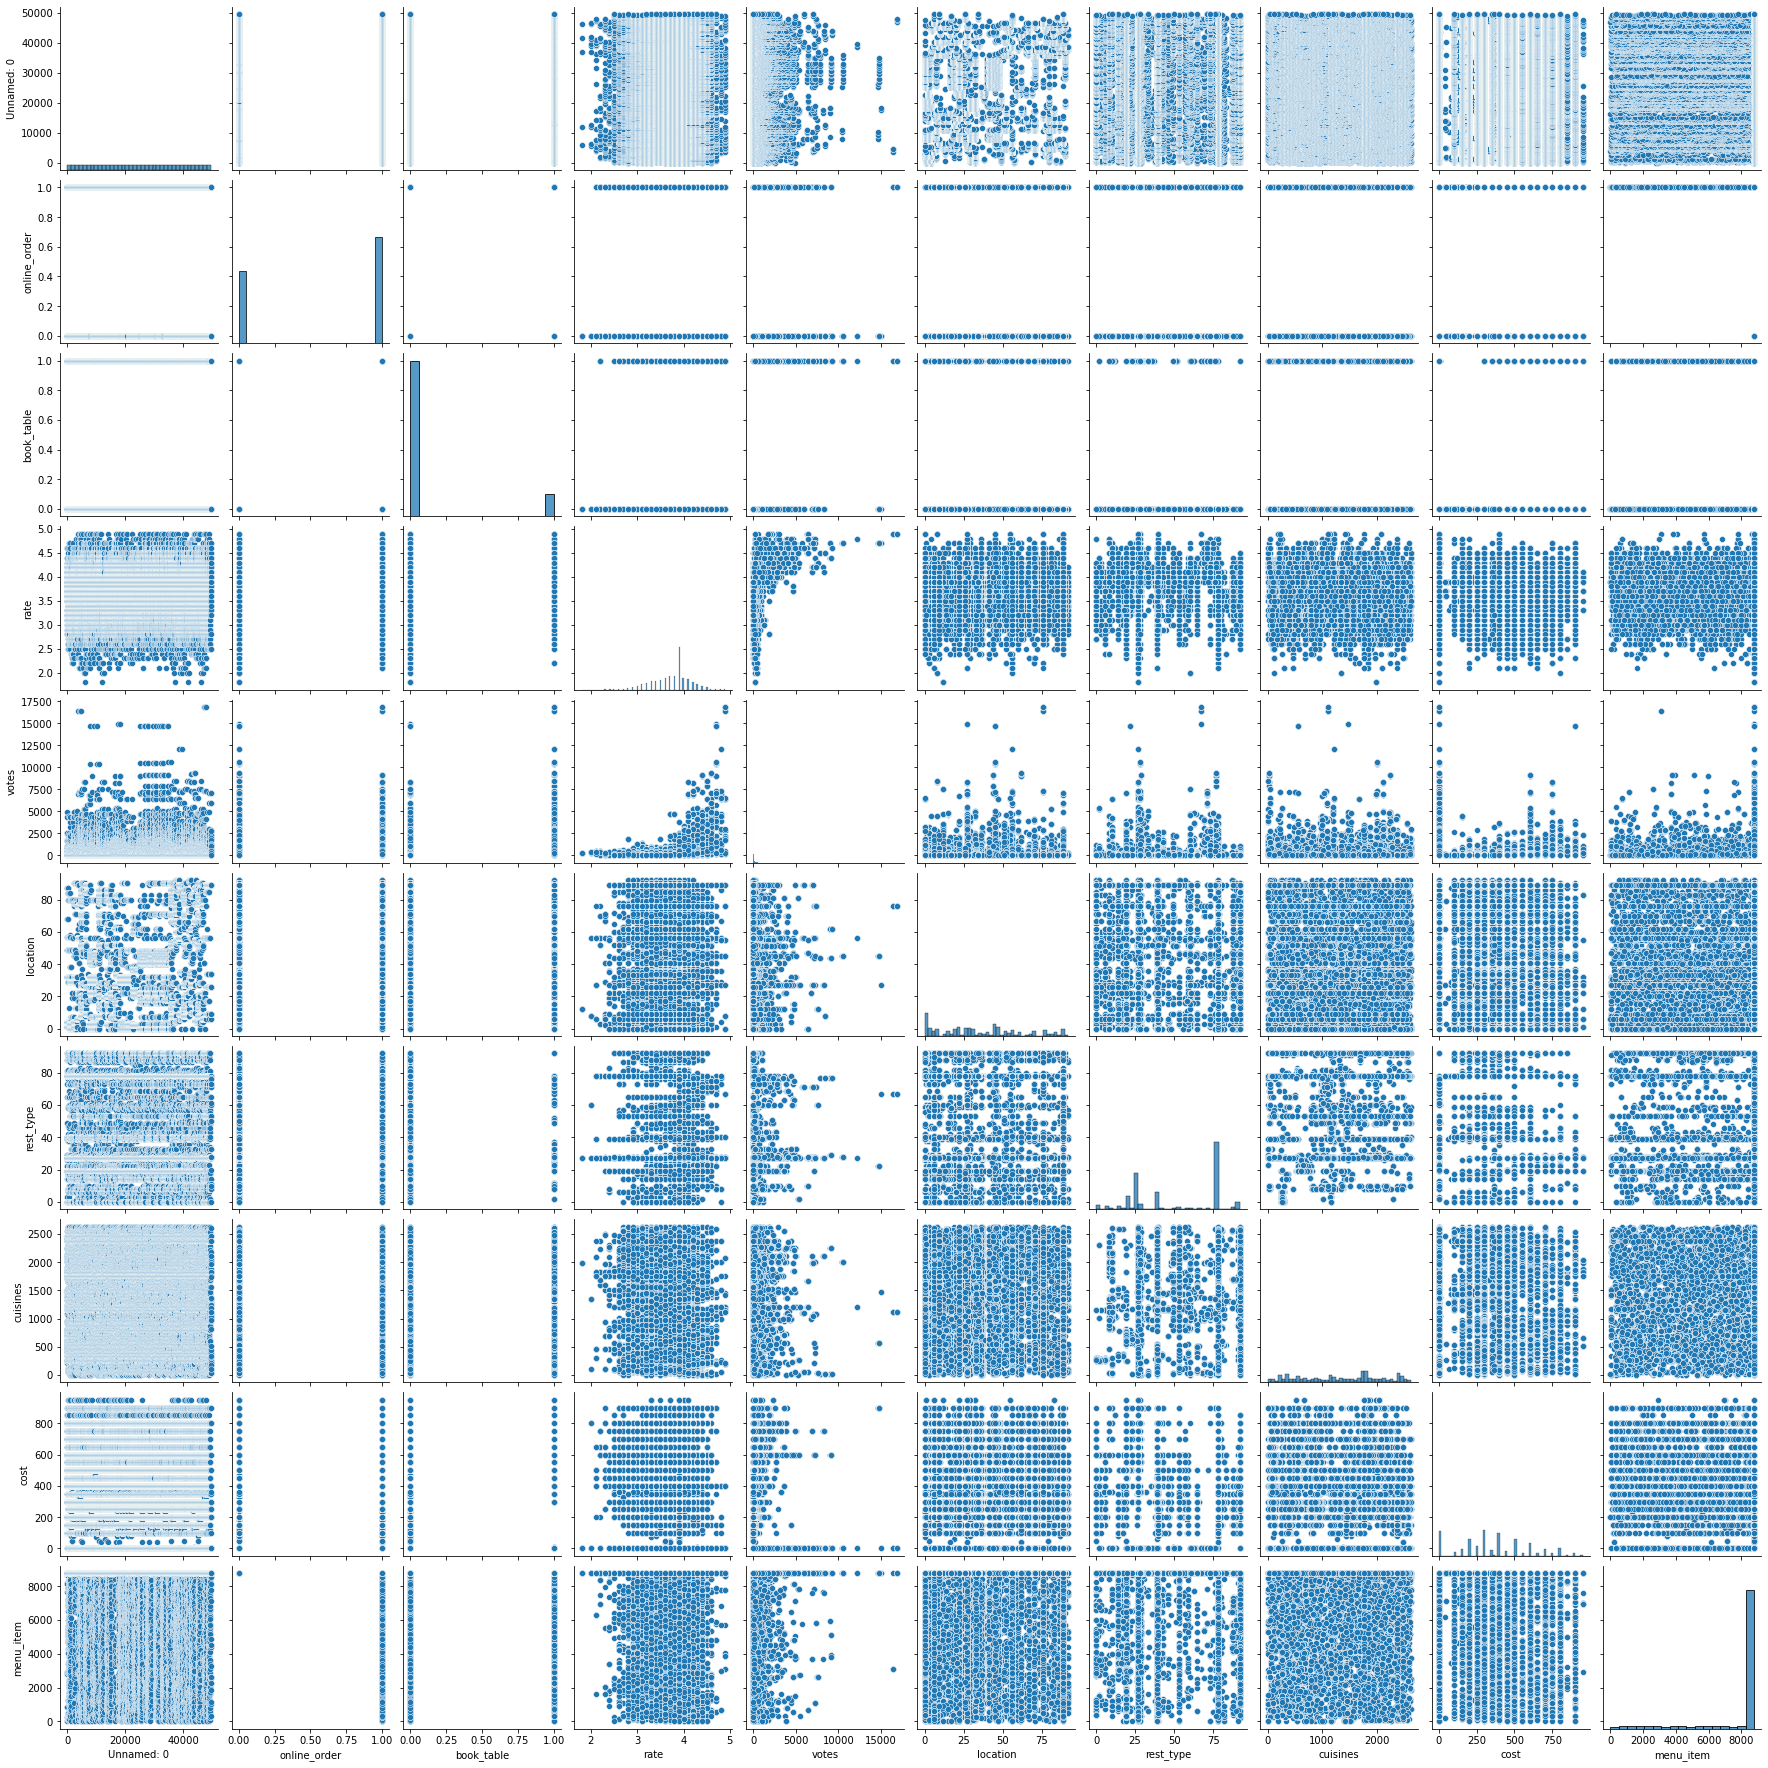

In [14]:
sns.pairplot(zomato)

### Step 3 i) Explore the data and find the hidden patterns in the data that affect your objective(target variable). ii) Find the features that would impact the target variable.

In [10]:
# Identify the categorical and numerical features
categorical_features = zomato.select_dtypes(include=np.number)
numerical_features =zomato.select_dtypes(include=object)

<AxesSubplot:xlabel='online_order', ylabel='count'>

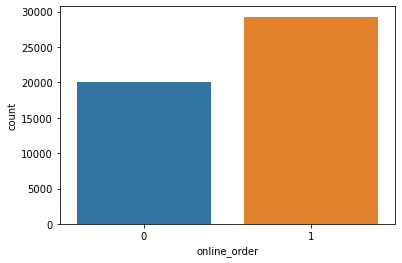

In [11]:
# Check the distribution of the target variable
sns.countplot(x='online_order', data=zomato)

<AxesSubplot:>

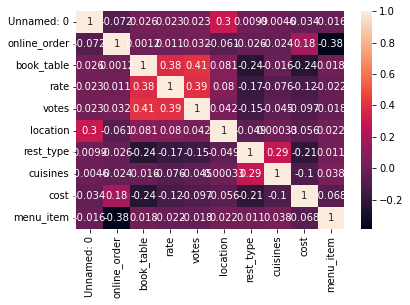

In [17]:
# Plot the correlation matrix
corr = zomato.corr()
sns.heatmap(corr, annot=True)

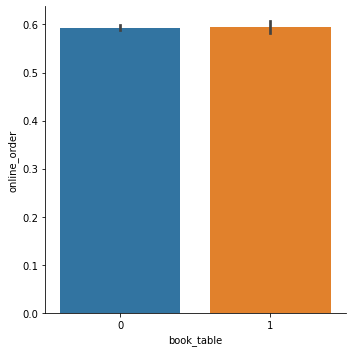

In [12]:
# Visualize the relationship between the target variable and important features
sns.catplot(x='book_table', y='online_order', kind='bar', data=zomato)

<AxesSubplot:xlabel='location', ylabel='online_order'>

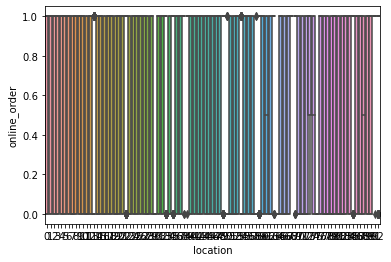

In [13]:
sns.boxplot(x='location', y='online_order', data=zomato)

### II

In [21]:
# Perform t-test to compare "online_order" rate between restaurants with and without table booking
table_booked = zomato[zomato['book_table'] == 1]['online_order']
no_table_booked = zomato[zomato['book_table'] == 0]['online_order']
t, p = ttest_ind(table_booked, no_table_booked)
print('t-test: t =', t,'\n p =', p)

t-test: t = 0.2678492612019735 
 p = 0.7888164703077925


In [29]:
# Perform Lasso regression to select the most relevant features
zomato.drop("Unnamed: 0",axis=1)
X = zomato.select_dtypes(include=np.number)
y = zomato['online_order']
model = Lasso(alpha=0.1)
model.fit(X, y)
features = X.columns
selected_features = features[model.coef_ != 0]
print('Selected features:', selected_features)

Selected features: Index(['Unnamed: 0', 'online_order', 'votes', 'location', 'rest_type',
       'cuisines', 'cost', 'menu_item'],
      dtype='object')


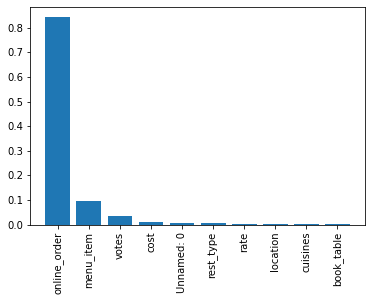

In [30]:
# Perform Random Forest classification to determine feature importances
clf = RandomForestClassifier()
clf.fit(X, y)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), X.columns[indices], rotation='vertical')
plt.show()

In [32]:
#split dataset in features and target variable
feature_cols = ["book_table","book_table","rate","votes","location","rest_type","cuisines","cost","menu_item"]
X = zomato[feature_cols] # Features
y = zomato["online_order"] # Target variable

In [33]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [34]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9430520840370196


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[5632  375]
 [ 468 8328]]


#### Optimizing decision tree

In [51]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    report_CT_ENT = classification_report(y_test, y_pred)
    print("Classification report:\n", report_CT_ENT)



Accuracy: 0.7384989529149497
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.67      6007
           1       0.77      0.80      0.78      8796

    accuracy                           0.74     14803
   macro avg       0.73      0.73      0.73     14803
weighted avg       0.74      0.74      0.74     14803



Model accuracy score with criterion entropy: 0.7385


[Text(0.375, 0.875, 'X[8] <= 8777.5\nentropy = 0.975\nsamples = 34539\nvalue = [14050, 20489]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 8154\nvalue = [0, 8154]'),
 Text(0.5, 0.625, 'X[3] <= 7.5\nentropy = 0.997\nsamples = 26385\nvalue = [14050, 12335]'),
 Text(0.25, 0.375, 'X[3] <= 4.5\nentropy = 0.78\nsamples = 7039\nvalue = [5412, 1627]'),
 Text(0.125, 0.125, 'entropy = 0.73\nsamples = 5556\nvalue = [4422, 1134]'),
 Text(0.375, 0.125, 'entropy = 0.917\nsamples = 1483\nvalue = [990, 493]'),
 Text(0.75, 0.375, 'X[7] <= 215.0\nentropy = 0.992\nsamples = 19346\nvalue = [8638, 10708]'),
 Text(0.625, 0.125, 'entropy = 0.966\nsamples = 5983\nvalue = [3636, 2347]'),
 Text(0.875, 0.125, 'entropy = 0.954\nsamples = 13363\nvalue = [5002, 8361]')]

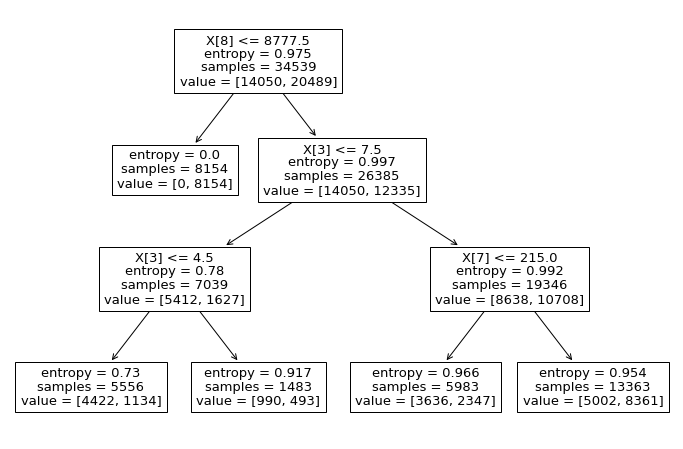

In [38]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
y_pred_train = clf.predict(X_train)
y_pred_train
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train))

#### Gini

In [50]:
# Create Decision Tree classifer object
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf_gini = clf_gini.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_gini.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
report_CT_G = classification_report(y_test, y_pred)
print("Classification report:\n", report_CT_G)


Accuracy: 0.7497804499088022
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69      6007
           1       0.79      0.79      0.79      8796

    accuracy                           0.75     14803
   macro avg       0.74      0.74      0.74     14803
weighted avg       0.75      0.75      0.75     14803



[Text(0.375, 0.875, 'X[8] <= 8777.5\ngini = 0.483\nsamples = 34539\nvalue = [14050, 20489]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 8154\nvalue = [0, 8154]'),
 Text(0.5, 0.625, 'X[3] <= 17.5\ngini = 0.498\nsamples = 26385\nvalue = [14050, 12335]'),
 Text(0.25, 0.375, 'X[3] <= 4.5\ngini = 0.408\nsamples = 10111\nvalue = [7225, 2886]'),
 Text(0.125, 0.125, 'gini = 0.325\nsamples = 5556\nvalue = [4422, 1134]'),
 Text(0.375, 0.125, 'gini = 0.473\nsamples = 4555\nvalue = [2803, 1752]'),
 Text(0.75, 0.375, 'X[7] <= 23.0\ngini = 0.487\nsamples = 16274\nvalue = [6825, 9449]'),
 Text(0.625, 0.125, 'gini = 0.452\nsamples = 3676\nvalue = [2409, 1267]'),
 Text(0.875, 0.125, 'gini = 0.455\nsamples = 12598\nvalue = [4416, 8182]')]

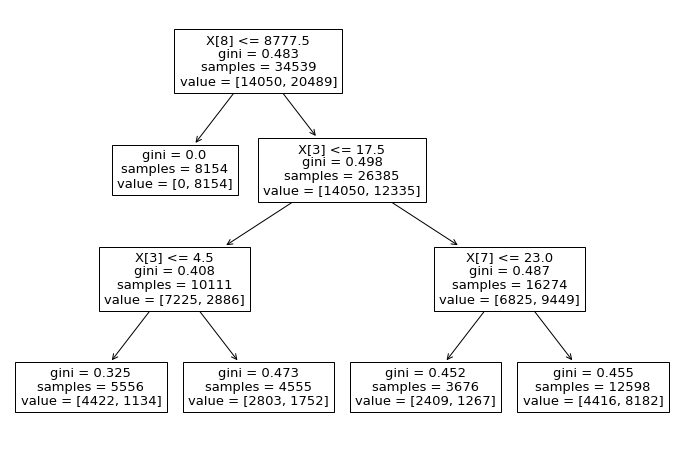

In [40]:
# Visualize decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report_KNN = classification_report(y_test, y_pred)
print("Classification report:\n", report_KNN)

Accuracy: 0.8675268526650003
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      6007
           1       0.89      0.88      0.89      8796

    accuracy                           0.87     14803
   macro avg       0.86      0.86      0.86     14803
weighted avg       0.87      0.87      0.87     14803



In [48]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the gradient boosting classifier with default parameters
clf_GB = GradientBoostingClassifier()

# Fit the classifier to the training data
clf_GB.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf_GB.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report_GB = classification_report(y_test, y_pred)
print("Classification report:\n", report_GB)

Accuracy: 0.7852462338715125
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      6007
           1       0.81      0.83      0.82      8796

    accuracy                           0.79     14803
   macro avg       0.78      0.78      0.78     14803
weighted avg       0.78      0.79      0.78     14803



In [47]:
from sklearn.naive_bayes import GaussianNB

# Train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
report_GNB = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification report:\n", report_GNB)

Accuracy: 0.6429777747753833
Classification report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69      6007
           1       1.00      0.40      0.57      8796

    accuracy                           0.64     14803
   macro avg       0.77      0.70      0.63     14803
weighted avg       0.81      0.64      0.62     14803



In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

In [55]:
# Define the models to be evaluated
models = [("Decision Tree", DecisionTreeClassifier()), 
          ("Random Forest", RandomForestClassifier()), 
          ("Naive Bayes", GaussianNB()),
          "GradientBoosting",GradientBoostingClassifier(),"K-NN",KNeighborsClassifier()]

Decision Tree: AUC = 0.90 (+/- 0.03)
Random Forest: AUC = 0.98 (+/- 0.01)
Naive Bayes: AUC = 0.76 (+/- 0.03)


ValueError: too many values to unpack (expected 2)

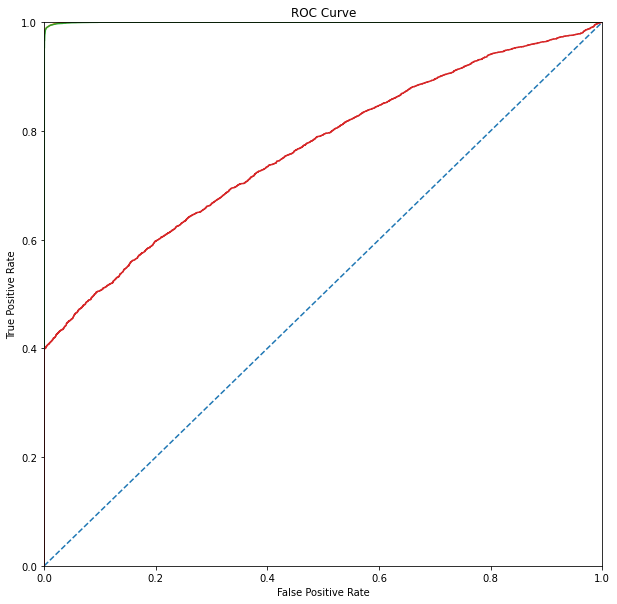

In [56]:
# Compare the performance of models using 5-fold cross-validation and ROC curve
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring="roc_auc")
    print(f"{name}: AUC = {scores.mean():.2f} (+/- {scores.std():.2f})")
    model.fit(X, y)
    y_proba = model.predict_proba(X)[:,1]
    fpr, tpr, _ = roc_curve(y, y_proba)
    plt.plot(fpr, tpr, label=name)

plt.legend(loc="lower right")
plt.show()